In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploratory Analysis of amount_Transactions 

In [5]:
# import the Pandas library as 
import pandas as pd

# read the CSV file 
# usethe first column as the index and attempting to parse dates
df = pd.read_csv('~/dataset-transaction/train_test_data.csv', index_col=0, parse_dates=True)

# Resampling the DataFrame 'df' at a daily frequency ('D') 
data = df.resample('D').sum()

#  the sizeof the data
data.size


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\halima/dataset-transaction/train_test_data.csv'

* pd.read_csv(): Reads the CSV file named 'train_test_data.csv' located at '/kaggle/input/dataset-transaction/'. The index_col=0 argument specifies that the first column of the CSV file should be used as the index of the DataFrame. parse_dates=True attempts to parse any date-like columns as dates.

* df.resample('D').sum(): Resamples the DataFrame 'df' at a daily frequency ('D') and sums the values within each day.

* data.size: Calculates the size of the resulting DataFrame 'data'. This will return the total number of elements in the DataFrame, which is the product of the number of rows and columns. We have 933 elements 

this code is reading transaction data from a CSV file, aggregating it on a daily basis, and then checking the total number of elements in the resulting DataFrame.






In [3]:
data

,Id_compte,amount_transaction,category_transaction
Date,,,
2022-01-01,SEWC_CL.1SEW0C_LI.1US.1TA.1US.1HP.1CPA_MP.1SEW...,2907.32,Food & Drink - GroceriesGeneral Services - Hom...
2022-01-02,IPA.1CPA.1US.1SEWC_P_PL.1SEWC_CL.1SEWC_P_PL.1S...,1100.87,Bank Transfers - ATM feesBank Transfers - Othe...
2022-01-03,SEWC_P.1IPA.1IPA.1SEW0C_HI.1SEWC_P_PL.1SEW0C_H...,5192.62,Food & Drink - RestaurantsBank Transfers - Oth...
2022-01-04,SEWC_CL.1CPA.1SEWC_P.1CPA.1IPA.1SEW0C_HI.1SEW0...,3547.83,Bank Transfers - ATM feesBank Transfers - ATM ...
2022-01-05,SEW0C_LI.1US.1US.1CPA_MP.1SEW0C_LI.1SEWC_P_PL....,2992.66,Bank Transfers - ATM feesBank Transfers - ATM ...
...,...,...,...
2022-11-03,US.1TA.1SEW0C_HI.1SEWC_P.1US.1SEWC_P_PL.1SEWC_...,3541.22,Bank Transfers - ATM withdrawalsFood & Drink -...
2022-11-04,CPA_MP.1SEW0C_LI.1SEWC_CL.1SEWC_P_PL.1SEW0C_LI...,3683.10,Bank Transfers - Other bank feesTransportation...
2022-11-05,CPA_MP.1SEWC_P.1CPA_MP.1SEW0C_LI.1SEWC_P.1IPA....,4794.93,Bank Transfers - Other bank feesTransportation...


In [4]:
print(len(data.index))  # the number of timestamps


311


In [5]:
# print the earliest date found in the index of the data 
print("Première date :", data.index.min())

# printing the latest date found in the index of the data
print("Dernière date :", data.index.max())


Première date : 2022-01-01 00:00:00
Dernière date : 2022-11-07 00:00:00


In [6]:
#calculating the duration or time span between the earliest and latest dates in the index.
print("Plage de temps couverte par les données :", data.index.max() - data.index.min())


Plage de temps couverte par les données : 310 days 00:00:00


In [7]:
#retrieves and prints the sampling frequency of the time series data within the data:
print("Fréquence d'échantillonnage :", data.index.freq)


Fréquence d'échantillonnage : <Day>


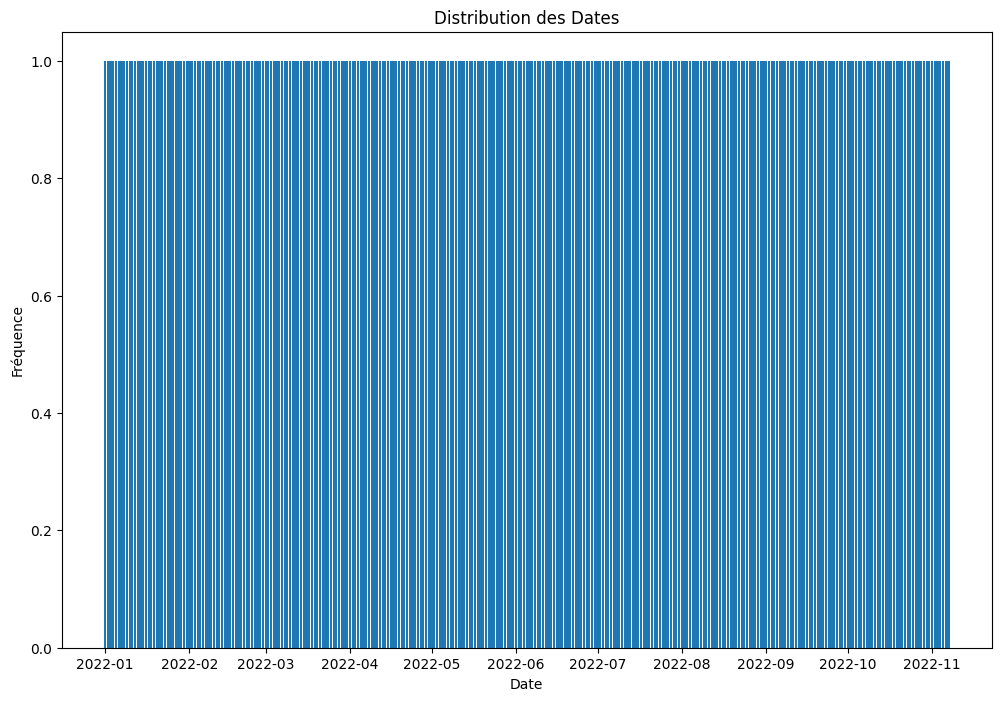

In [8]:
import matplotlib.pyplot as plt  # Importing the necessary library for plotting

# Counting the frequency of each date in the 'data' DataFrame's index
date_counts = data.index.value_counts()

#  Visualization of the distribution of dates using a bar plot
plt.figure(figsize=(12, 8))  # Setting the figure size for the plot
plt.bar(date_counts.index, date_counts.values)  # Creating a bar plot with dates on x-axis and frequencies on y-axis
plt.title('Distribution des Dates')  #   Setting the title of the plot
plt.xlabel('Date')  # Labeling the x-axis as 'Date'
plt.ylabel('Fréquence')  #  Labeling the y-axis as 'Fréquence' (Frequency)
plt.show()   # Displaying the plot


The uniformity in the distribution of bars suggests that each date within the dataset occurs at a similar frequency. There are no notable spikes or variations in the frequency of dates, indicating a consistent and stable pattern of occurrence throughout the dataset.

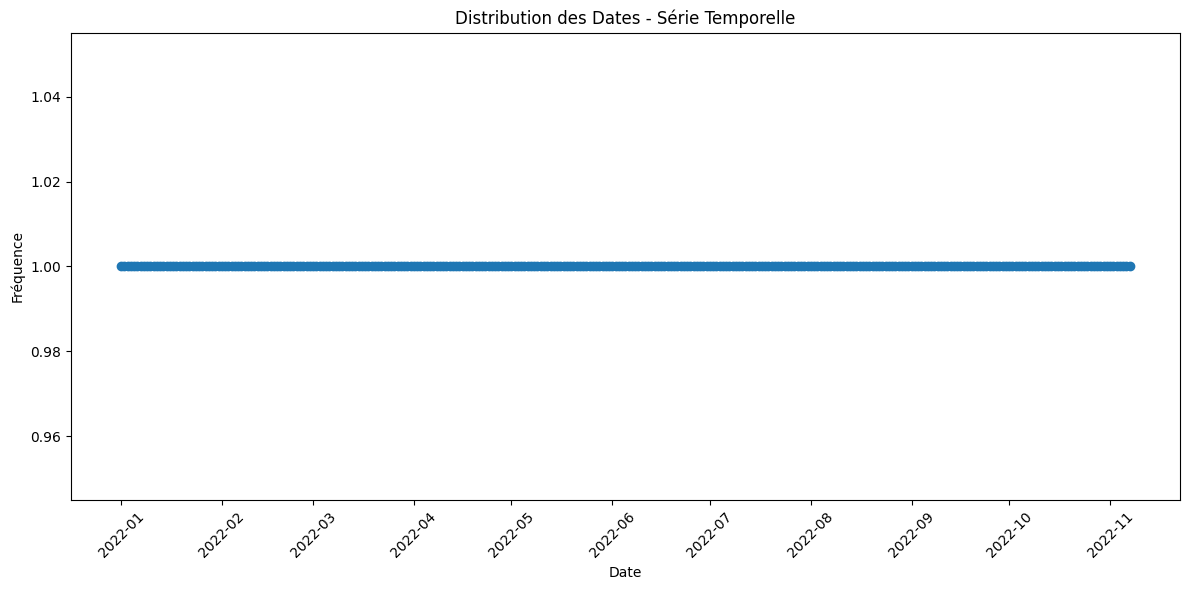

In [9]:
import matplotlib.pyplot as plt  # Importing the necessary library for plotting

# count the frequency of each date in the index of data 
date_counts = data.index.value_counts()

# creating a time series plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-')  # creating  line plot 
plt.title('Distribution des Dates - Série Temporelle')  # Set the title of the plot
plt.xlabel('Date')  # label the x  axis : Date
plt.ylabel('Fréquence')  #label the y axis : Fréquence 
plt.xticks(rotation=45)  # Rotate the date labels 
plt.tight_layout()  # adjust the the plot
plt.show()  # display the plot



the plot indicates that each date occurs only once throughout the entire dataset. This consistency implies that there are no repeated occurrences of dates within the dataset, suggesting a unique presence of each date with a frequency of 1, regardless of the day.

count      311.000000
mean      3737.977267
std       1794.407486
min        646.920000
25%       2501.195000
50%       3370.750000
75%       4686.950000
max      10115.620000
Name: amount_transaction, dtype: float64


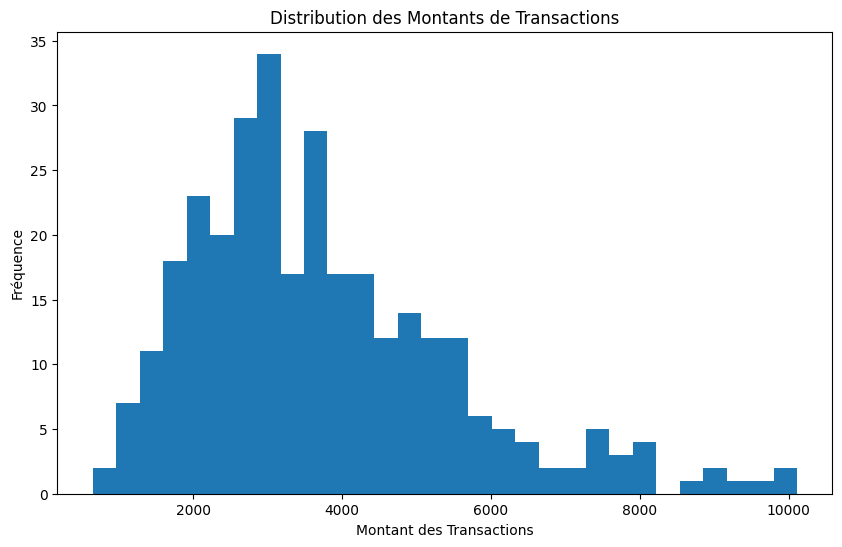

In [10]:
#descriptive statistics
print(data['amount_transaction'].describe())

# visualization
import matplotlib.pyplot as plt  

plt.figure(figsize=(10, 6))  
plt.hist(data['amount_transaction'], bins=30)  # create  histogram with 30 bins
plt.title('Distribution des Montants de Transactions')  # set the title of the plot
plt.xlabel('Montant des Transactions')  # the x axis as Montant des Transactions 
plt.ylabel('Fréquence')  # = the y axis as Fréquence
plt.show() 



## Interpretation :
the statistics for the 'amount_transaction' column:

* count: 311 observations.
* mean: 3737.98, indicate the average transaction amount.
* standard deviation: 1794.41, the spread or variability of transaction amounts around the mean.
* minimum transaction amount: 646.92.
* quartiles (25%, 50%, 75%): 2501.20, 3370.75, 4686.95 .
* Maximum transaction amount: 10115.62.

the histogram illustrates the distribution of transaction amounts.
while the shape appears somewhat bell-shaped or resembling a normal distribution, it is not centered around zero.
this suggests that although the distribution has a similar pattern to a normal distribution, the values are not clustered or centered around a mean of zero. instead, they are centered around the calculated mean of approximately 3738, showing a right-skewed distribution where higher transaction amounts are more frequent than lower ones.

In [11]:
data

,Id_compte,amount_transaction,category_transaction
Date,,,
2022-01-01,SEWC_CL.1SEW0C_LI.1US.1TA.1US.1HP.1CPA_MP.1SEW...,2907.32,Food & Drink - GroceriesGeneral Services - Hom...
2022-01-02,IPA.1CPA.1US.1SEWC_P_PL.1SEWC_CL.1SEWC_P_PL.1S...,1100.87,Bank Transfers - ATM feesBank Transfers - Othe...
2022-01-03,SEWC_P.1IPA.1IPA.1SEW0C_HI.1SEWC_P_PL.1SEW0C_H...,5192.62,Food & Drink - RestaurantsBank Transfers - Oth...
2022-01-04,SEWC_CL.1CPA.1SEWC_P.1CPA.1IPA.1SEW0C_HI.1SEW0...,3547.83,Bank Transfers - ATM feesBank Transfers - ATM ...
2022-01-05,SEW0C_LI.1US.1US.1CPA_MP.1SEW0C_LI.1SEWC_P_PL....,2992.66,Bank Transfers - ATM feesBank Transfers - ATM ...
...,...,...,...
2022-11-03,US.1TA.1SEW0C_HI.1SEWC_P.1US.1SEWC_P_PL.1SEWC_...,3541.22,Bank Transfers - ATM withdrawalsFood & Drink -...
2022-11-04,CPA_MP.1SEW0C_LI.1SEWC_CL.1SEWC_P_PL.1SEW0C_LI...,3683.10,Bank Transfers - Other bank feesTransportation...
2022-11-05,CPA_MP.1SEWC_P.1CPA_MP.1SEW0C_LI.1SEWC_P.1IPA....,4794.93,Bank Transfers - Other bank feesTransportation...


We can't effectively visualize the amount_transaction grouped by category_transaction after resampling the data, the resulting numerous transactions per amount_transaction make it impractical for meaningful  utilization in our model ; same thing for Id_compte...

In [12]:
# extracting year, month, and day as features from the index sate in the data 
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

In [13]:
data

,Id_compte,amount_transaction,category_transaction,Year,Month,Day
Date,,,,,,
2022-01-01,SEWC_CL.1SEW0C_LI.1US.1TA.1US.1HP.1CPA_MP.1SEW...,2907.32,Food & Drink - GroceriesGeneral Services - Hom...,2022,1,1
2022-01-02,IPA.1CPA.1US.1SEWC_P_PL.1SEWC_CL.1SEWC_P_PL.1S...,1100.87,Bank Transfers - ATM feesBank Transfers - Othe...,2022,1,2
2022-01-03,SEWC_P.1IPA.1IPA.1SEW0C_HI.1SEWC_P_PL.1SEW0C_H...,5192.62,Food & Drink - RestaurantsBank Transfers - Oth...,2022,1,3
2022-01-04,SEWC_CL.1CPA.1SEWC_P.1CPA.1IPA.1SEW0C_HI.1SEW0...,3547.83,Bank Transfers - ATM feesBank Transfers - ATM ...,2022,1,4
2022-01-05,SEW0C_LI.1US.1US.1CPA_MP.1SEW0C_LI.1SEWC_P_PL....,2992.66,Bank Transfers - ATM feesBank Transfers - ATM ...,2022,1,5
...,...,...,...,...,...,...
2022-11-03,US.1TA.1SEW0C_HI.1SEWC_P.1US.1SEWC_P_PL.1SEWC_...,3541.22,Bank Transfers - ATM withdrawalsFood & Drink -...,2022,11,3
2022-11-04,CPA_MP.1SEW0C_LI.1SEWC_CL.1SEWC_P_PL.1SEW0C_LI...,3683.10,Bank Transfers - Other bank feesTransportation...,2022,11,4
2022-11-05,CPA_MP.1SEWC_P.1CPA_MP.1SEW0C_LI.1SEWC_P.1IPA....,4794.93,Bank Transfers - Other bank feesTransportation...,2022,11,5


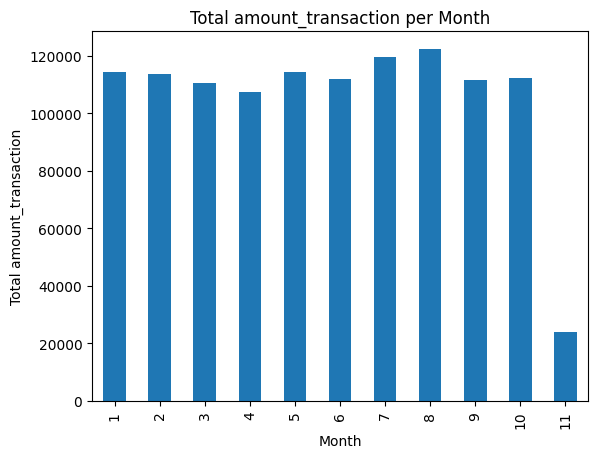

In [14]:
import matplotlib.pyplot as plt

# total transactions by month
monthly_transactions = data.groupby('Month')['amount_transaction'].sum()

# bar chart for monthly transactions
monthly_transactions.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total amount_transaction')
plt.title('Total amount_transaction per Month')
plt.show()


the visualization with bars representing total transactions per month, shows a smaller bar for the month of November (Month 11) compared to other months. This might suggest relatively lower transaction activity during November compared to other months in the year 2022.but in general the other month are in the same range.

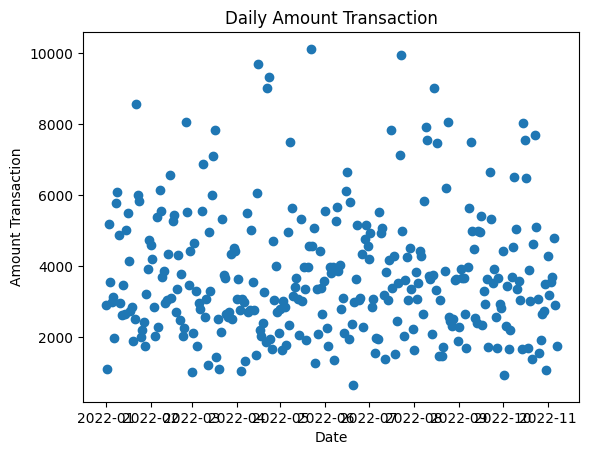

In [15]:
# scatter plot for transactions by day
plt.scatter(data.index, data['amount_transaction'])
plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Daily Amount Transaction')
plt.show()


the scatter plot representing daily transactions doesn't exhibit a clear trend or evident correlation. The points appear scattered without following a specific pattern. This could indicate that transactions don't follow a specific pattern throughout the year, or there might be other factors not represented in this data that influence transaction amounts.

In [16]:
#select numerical columns, Month and Day
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
numerical_columns = numerical_columns.join(data[['Month', 'Day']])

# calculate the  matrix of correlation
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)


                    amount_transaction     Month       Day
amount_transaction            1.000000 -0.006793  0.027669
Month                        -0.006793  1.000000 -0.040136
Day                           0.027669 -0.040136  1.000000


The correlation between 'amount_transaction' (transaction amount) and 'Month' is close to zero (-0.006793). This suggests a very weak correlation, indicating no clear linear relationship between the transaction amount and the month of the year.

Similarly, the correlation between 'amount_transaction' and 'Day' is also weak (0.027669), indicating a very limited relationship between the transaction amount and the day of the month.

Between 'Month' and 'Day', the correlation is also quite low (-0.040136), suggesting a relatively weak relationship between the month and the day.

These outcomes suggest that there isn't a strong linear correlation between transaction amounts, the months of the year, or the days of the month based on this correlation analysis.
##### we will not use theses features (Day, Month and Year)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Date
2022-01-01    2907.32
2022-01-02    1100.87
2022-01-03    5192.62
2022-01-04    3547.83
2022-01-05    2992.66
Freq: D, Name: amount_transaction, dtype: float64


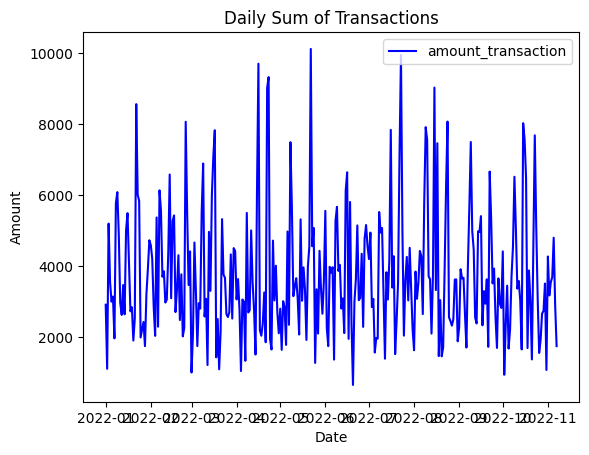

In [18]:

x = pd.read_csv('/kaggle/input/dataset-transaction/train_test_data.csv', index_col=0, parse_dates=True)

# resample data 
serie = x['amount_transaction'].resample('D').sum()
print(serie.head())
# Create a figure and axes to plot the data
fig, ax = plt.subplots()

# plot the resampled series
ln1 = ax.plot(serie.index, serie.values, c='b', label="amount_transaction")

# set the labels 
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title('Daily Sum of Transactions')
lns = ln1
labels = [l.get_label() for l in lns]
ax.legend(lns, labels)

# show the plot
plt.show()

In [19]:
serie

Date
2022-01-01    2907.32
2022-01-02    1100.87
2022-01-03    5192.62
2022-01-04    3547.83
2022-01-05    2992.66
               ...   
2022-11-03    3541.22
2022-11-04    3683.10
2022-11-05    4794.93
2022-11-06    2895.06
2022-11-07    1739.85
Freq: D, Name: amount_transaction, Length: 311, dtype: float64

In [20]:
import pandas as pd
import statsmodels.api as sm  # Importing statsmodels

In [21]:
# creation of the serie_df DataFrame from the time series 'serie'
serie_df = pd.DataFrame({'Date': serie.index, 'transaction': serie.values})
serie_df['Days'] = (serie_df['Date'] - serie_df['Date'].min()).dt.days

# modeling linear regression using the  column : Days from serie_df
X = serie_df['Days']
X = sm.add_constant(X)
y = serie_df['transaction']  # using the column : transaction for prediction
model = sm.OLS(y, X).fit()

# summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            transaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.004377
Date:                Sat, 25 Nov 2023   Prob (F-statistic):              0.947
Time:                        20:11:12   Log-Likelihood:                -2770.9
No. Observations:                 311   AIC:                             5546.
Df Residuals:                     309   BIC:                             5553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3749.6180    203.340     18.440      0.0

I performed a linear regression on  the time series dataset to explore the relationship between time and transaction amounts. it creates a DataFrame, serie_df, from the time series data, establishing a Days column representing the elapsed time. i am using Ordinary Least Squares (OLS) regression, I attempt to model transaction amounts based on time. but, the regression analysis indicates a negligible and statistically insignificant relationship between time and transaction amounts. The low R-squared value suggests that the linear model doesn't effectively explain the fluctuations in transaction amounts over time. I did this to know if there is any trend in the data , it apears that there is no trend . let's do other techniques to discover patterns.

In [22]:
# Using the rolling function to calculate the moving average
window_size = 10  # Window size for the moving average
serie_df['Moving_Avg'] = serie_df['transaction'].rolling(window=window_size).mean()

# Displaying the original data and the moving average
print(serie_df[['Date', 'transaction', 'Moving_Avg']])


          Date  transaction  Moving_Avg
0   2022-01-01      2907.32         NaN
1   2022-01-02      1100.87         NaN
2   2022-01-03      5192.62         NaN
3   2022-01-04      3547.83         NaN
4   2022-01-05      2992.66         NaN
..         ...          ...         ...
306 2022-11-03      3541.22    2746.850
307 2022-11-04      3683.10    2808.552
308 2022-11-05      4794.93    3133.308
309 2022-11-06      2895.06    3231.088
310 2022-11-07      1739.85    3139.517

[311 rows x 3 columns]


the code calculates the moving average of the 'transaction' column using a window size of 10 and stores the result in a new column called 'Moving_Avg' within the 'serie_df' DataFrame. 

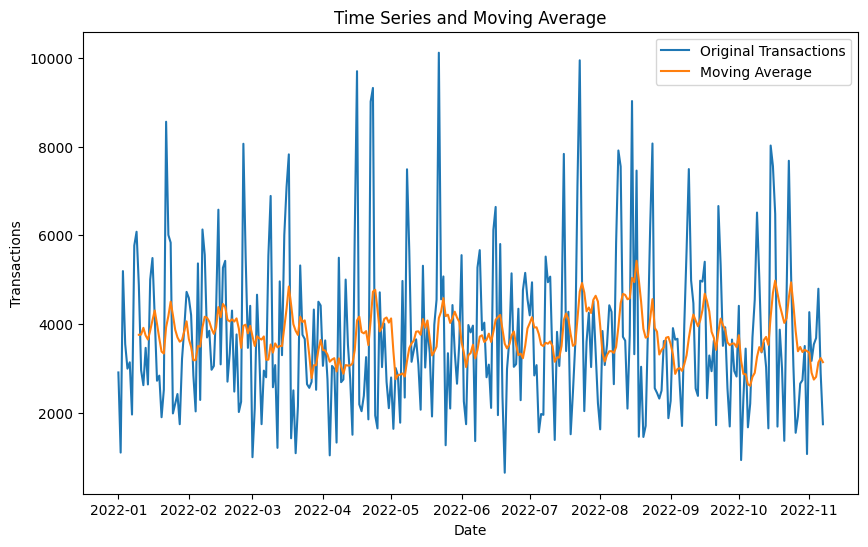

In [23]:
import matplotlib.pyplot as plt

# Plotting the original time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(serie_df['Date'], serie_df['transaction'], label='Original Transactions')
plt.plot(serie_df['Date'], serie_df['Moving_Avg'], label='Moving Average')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Time Series and Moving Average')
plt.show()

This visualization shows the original time series data ('Original Transactions') and the calculated moving average ('Moving Average') plotted against dates. 
"The absence of trends indicates that the series is predominantly stationary."

## Augmented Dickey-Fuller (ADF) Test for Stationarity:


In [24]:
from statsmodels.tsa.stattools import adfuller

# Running the ADF test
result = adfuller(serie)

# Displaying the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -6.42946198933583
p-value: 1.711693678005305e-08
Critical Values: {'1%': -3.452045317832011, '5%': -2.871094805558846, '10%': -2.571860921485457}


The results of the Augmented Dickey-Fuller (ADF) test we obtained show a test statistic of -6.429 and an extremely low p-value (1.71e-08, approximately 0). This suggests that the time series on which you conducted the test is stationary.

The null hypothesis (H0) is that the time series has a unit root, indicating it is non-stationary. With a very low p-value, well below common thresholds like 0.05 or 0.01, you have ample evidence to reject this null hypothesis. In other words, the time series appears to be stationary.

The provided critical values give threshold values at different significance levels (1%, 5%, 10%). When the test statistic is lower than these critical values, it strengthens the argument for rejecting the null hypothesis.

In [25]:
serie

Date
2022-01-01    2907.32
2022-01-02    1100.87
2022-01-03    5192.62
2022-01-04    3547.83
2022-01-05    2992.66
               ...   
2022-11-03    3541.22
2022-11-04    3683.10
2022-11-05    4794.93
2022-11-06    2895.06
2022-11-07    1739.85
Freq: D, Name: amount_transaction, Length: 311, dtype: float64

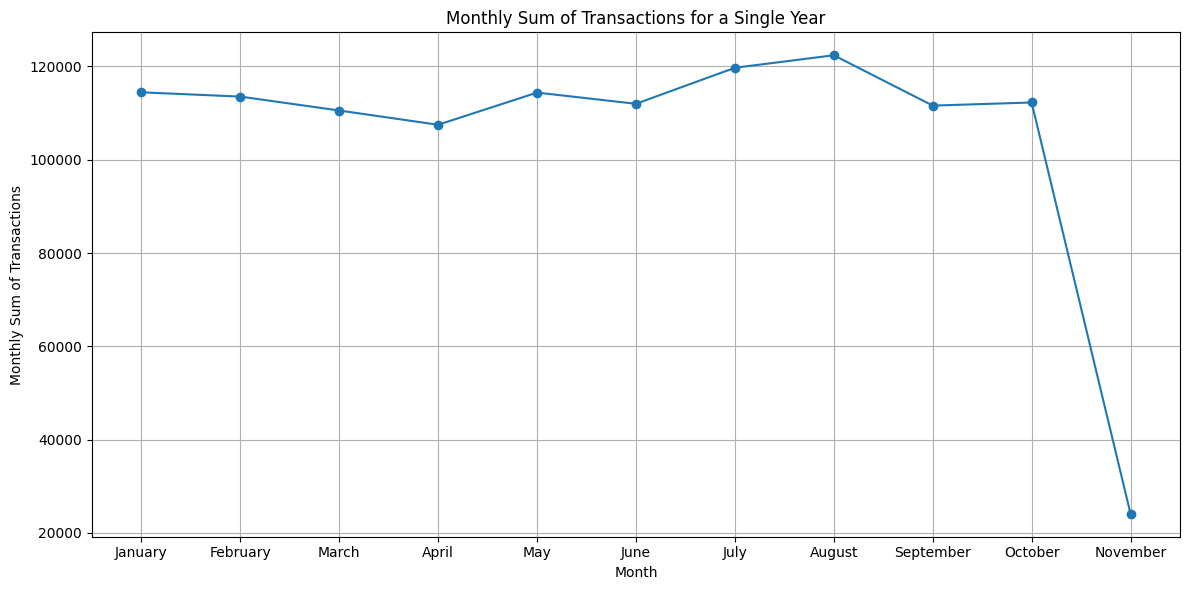

In [26]:
# Resample the data to get the sum of transactions per month
monthly_data = x.resample('M').sum()

plt.figure(figsize=(12, 6))

# Plot the sum of monthly transactions for a single year
plt.plot(monthly_data.index.month_name(), monthly_data['amount_transaction'], marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Monthly Sum of Transactions')
plt.title('Monthly Sum of Transactions for a Single Year')

plt.grid(True)
plt.tight_layout()
plt.show()


This graph doesn't show any seasonal patterns or cyclical trends in the data.

## Time Series Components

A useful abstraction for selecting forecasting methods is to break a time series down into
systematic and unsystematic components.
*  Systematic: Components of the time series that have consistency or recurrence and can
be described and modeled.
*  Non-Systematic: Components of the time series that cannot be directly modeled.
A given time series is thought to consist of three systematic components including level,
trend, seasonality, and one non-systematic component called noise. These components are:
*  Level: The average value in the series.
*  Trend: The increasing or decreasing value in the series.
*  Seasonality: The repeating short-term cycle in the series.
*  Noise: The random variation in the series.


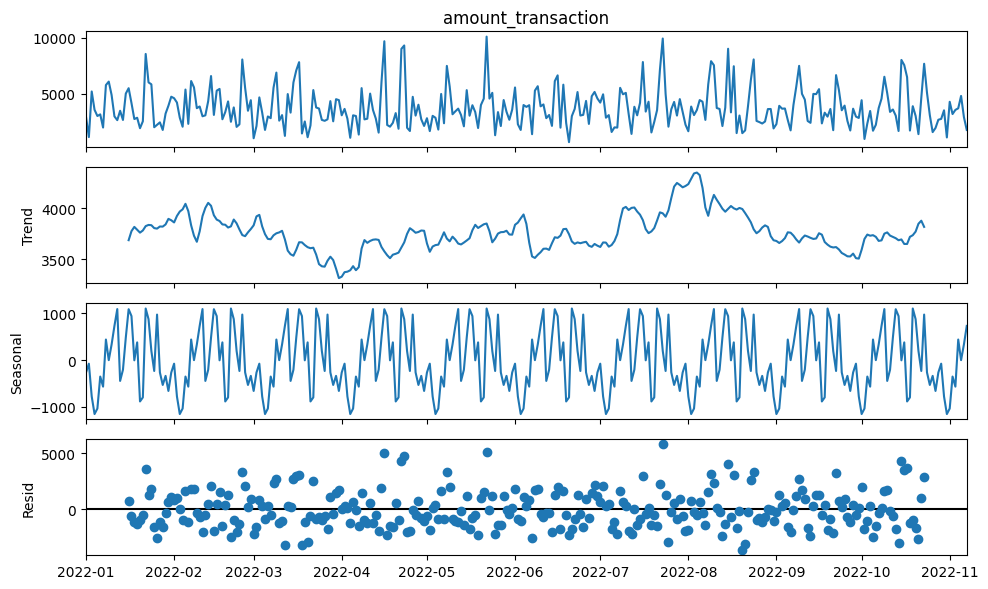

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# Decompose the time series 'serie' using an additive model with a seasonal period of 30
decomp = seasonal_decompose(serie, model='additive', period=30)

# Plot the decomposed components: observed, trend, seasonal, and residuals
fig = decomp.plot()
fig.set_size_inches((10, 6))  # Set figure size
fig.tight_layout()  # Adjust layout for better spacing
plt.show()


Running the code plots the observed, trend, seasonal, and residual time series. We can see that the trend and seasonality information extracted from the series does seem reasonable.
The residuals are also interesting, showing periods of high variability in the early and later days of the series.
there is no trend in the serie.

# Forecasting using the ARIMA model 

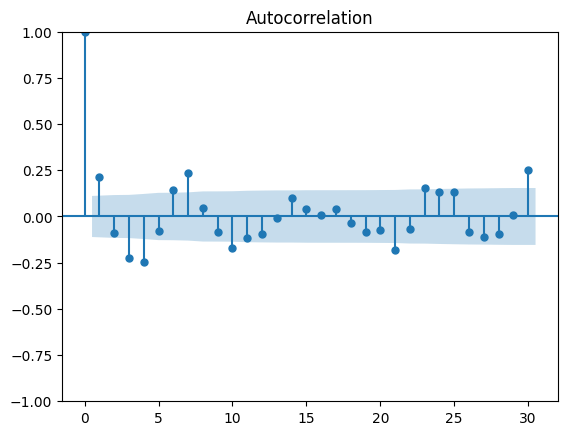

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

serie.iloc[0] = 0  # Set the first value of the series to 0 to handle non-stationarity
plot_acf(serie, lags=30)  # Plot the autocorrelation function (ACF) up to lag 30
plt.show()

The lag at which the ACF plot first crosses below the significance threshold (within the shaded region) indicates the value of q. p=1


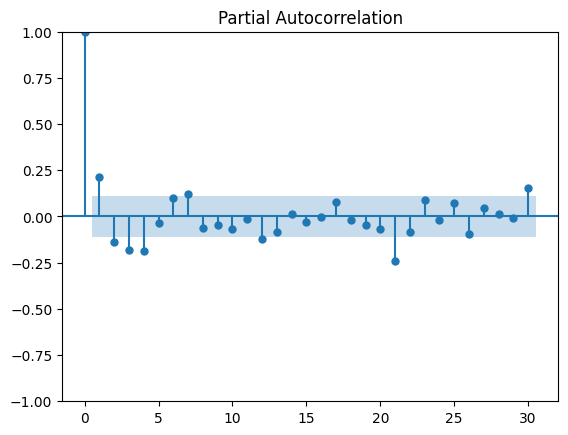

In [29]:
serie.iloc[0] = 0
plot_pacf(serie, lags=30)
plt.show()


The lag at which the PACF (Partial AutoCorrelation Function) plot first crosses below the significance threshold (within the shaded region) typically indicates the value of p. p=5




No trend no differenting

when using order = (5,0,1) the Maximum Likelihood optimization process failed to converge when fitting the ARIMA model. we will use the grid search algorithme to find the best Hyperparameters


order=(4,0,5))

# The model ARIMA

Train - predicted=3569.027774, expected=1100.870000
Train - predicted=4199.251602, expected=5192.620000
Train - predicted=5258.932545, expected=3547.830000
Train - predicted=4679.967142, expected=2992.660000
Train - predicted=3985.577640, expected=3137.050000
Train - predicted=3507.920151, expected=1958.840000
Train - predicted=3551.865613, expected=5769.230000
Train - predicted=4467.747538, expected=6079.430000
Train - predicted=4253.685075, expected=4878.050000
Train - predicted=3680.430351, expected=2958.500000
Train - predicted=2767.281295, expected=2620.670000
Train - predicted=2952.034128, expected=3461.820000
Train - predicted=3662.065348, expected=2636.710000
Train - predicted=3843.067197, expected=5003.740000
Train - predicted=4313.559907, expected=5487.160000
Train - predicted=4098.946660, expected=4151.260000
Train - predicted=3600.254509, expected=2720.320000
Train - predicted=3022.991306, expected=2836.060000
Train - predicted=3255.015086, expected=1898.070000
Train - pred

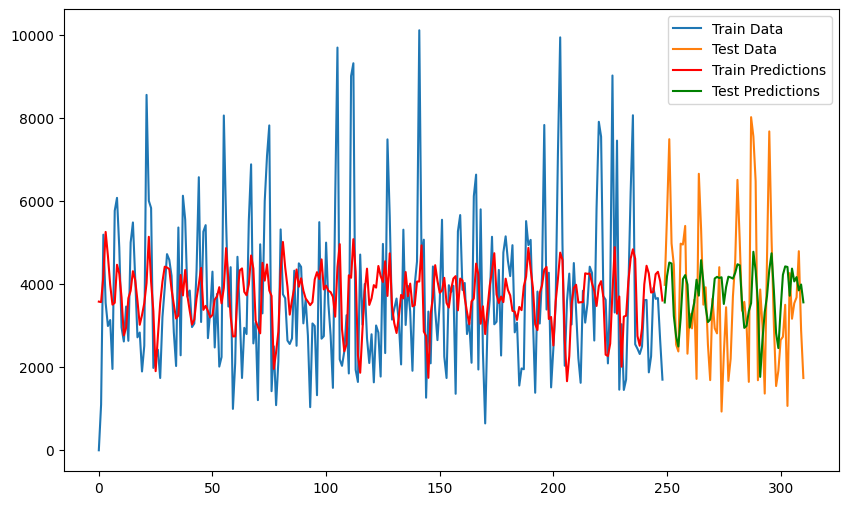

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Using the 80th percentile date for splitting
split_date = serie.index[int(0.8 * len(serie))]  

# Filtering out data based on date for forecasting (e.g., keeping data after a certain date)
train_data = serie.loc[serie.index <= split_date]  
test_data = serie.loc[serie.index > split_date]  

# reset index for test
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

history = [x for x in train_data]  
train_predictions = list()
test_predictions = list()

# walk-forward validation sur les données d'entraînement
for t in range(len(train_data)):
    model = ARIMA(history, order=(5,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    train_predictions.append(yhat)
    obs = train_data[t]
    if t > 0:  # Imprimer les prédictions à partir du deuxième point
        print('Train - predicted=%f, expected=%f' % (yhat, obs))
    history.append(obs)

# walk-forward validation sur les données de test
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    test_predictions.append(yhat)
    obs = test_data[t]
    if t > 0:  # Imprimer les prédictions à partir du deuxième point
        print('Test - predicted=%f, expected=%f' % (yhat, obs))
    history.append(obs)

# evaluate forecasts
train_rmse = sqrt(mean_squared_error(train_data, train_predictions))
test_rmse = sqrt(mean_squared_error(test_data, test_predictions))

print('Train RMSE: %.3f' % train_rmse)
print('Test RMSE: %.3f' % test_rmse)

# plot forecasts against actual outcomes
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_data)), train_data, label='Train Data')
plt.plot(range(len(train_data), len(serie)), test_data, label='Test Data')
plt.plot(range(len(train_predictions)), train_predictions, color='red', label='Train Predictions')
plt.plot(range(len(train_predictions), len(serie)), test_predictions, color='green', label='Test Predictions')
plt.legend()
plt.show()


## let's try to do a grid seach Method to find the best P and q:

# Grid Search parameters

In [31]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

# define the possible values for p, d, and q
p = range(0, 6)  
d = range(0, 6)   
q = range(0, 6)  

# generate possible combinations of p and d and q
param_combinations = list(itertools.product(p, d, q))

best_rmse = float('inf')
best_params = None
# reset index for test
train_data = train_data.reset_index(drop=True)

history = [x for x in train_data]  
predictions = list()
# Ignore warnings
warnings.filterwarnings("ignore")

# loop through parameter combinations and fit the model
for param in param_combinations:
    try:
        # instantiate and fit ARIMA model for each parameter combination
        model = ARIMA(history, order=param)
        model_fit = model.fit()
        
        # predictions
        predictions = model_fit.forecast(steps=len(test_data))
        
        # RMSE
        rmse = sqrt(mean_squared_error(test_data, predictions))
        
        # Update best parameters if RMSE improves
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = param
        
        print(f'ARIMA{param} RMSE: {rmse:.3f}')
        
    except:
        continue

print(f'Best RMSE: {best_rmse:.3f} with parameters: {best_params}')


ARIMA(0, 0, 0) RMSE: 1702.269
ARIMA(0, 0, 1) RMSE: 1703.934
ARIMA(0, 0, 2) RMSE: 1701.507
ARIMA(0, 0, 3) RMSE: 1681.716
ARIMA(0, 0, 4) RMSE: 1670.099
ARIMA(0, 0, 5) RMSE: 1660.068
ARIMA(0, 1, 0) RMSE: 2634.664
ARIMA(0, 1, 1) RMSE: 1702.167
ARIMA(0, 1, 2) RMSE: 1703.939
ARIMA(0, 1, 3) RMSE: 1702.976
ARIMA(0, 1, 4) RMSE: 1683.557
ARIMA(0, 1, 5) RMSE: 1672.202
ARIMA(0, 2, 0) RMSE: 35598.238
ARIMA(0, 2, 1) RMSE: 2491.308
ARIMA(0, 2, 2) RMSE: 5411.656
ARIMA(0, 2, 3) RMSE: 5517.788
ARIMA(0, 2, 4) RMSE: 5533.645
ARIMA(0, 2, 5) RMSE: 5405.311
ARIMA(0, 3, 0) RMSE: 49335.647
ARIMA(0, 3, 1) RMSE: 38848.234
ARIMA(0, 3, 2) RMSE: 4708.905
ARIMA(0, 3, 3) RMSE: 1750.509
ARIMA(0, 3, 4) RMSE: 1837.313
ARIMA(0, 3, 5) RMSE: 6516.325
ARIMA(0, 4, 0) RMSE: 18649325.048
ARIMA(0, 4, 1) RMSE: 55301.425
ARIMA(0, 4, 2) RMSE: 49963.247
ARIMA(0, 4, 3) RMSE: 15976.218
ARIMA(0, 4, 4) RMSE: 14463.267
ARIMA(0, 4, 5) RMSE: 15292.015
ARIMA(0, 5, 0) RMSE: 601732992.208
ARIMA(0, 5, 1) RMSE: 19720550.354
ARIMA(0, 5, 2) RMSE

It looks like the initial parameters (4,0,5) have the best RMSE among the combinations tested

In [36]:
model = ARIMA(history, order=(4, 0, 5))  
model_fit = model.fit()

# predict for train set
train_predictions = model_fit.predict(start=0, end=len(train_data) - 1, typ='levels')

# Calculate residuals for train set
train_residuals = train_data - train_predictions

# predictions for test set
test_predictions = model_fit.predict(start=len(train_data), end=len(serie) - 1, typ='levels')

# calculate residuals for test set
test_residuals = test_data - test_predictions



# Model Evaluation

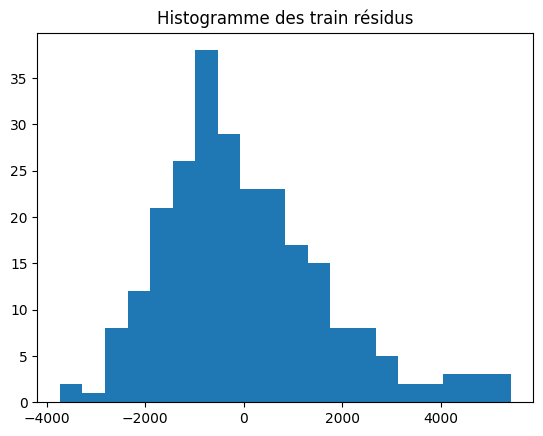

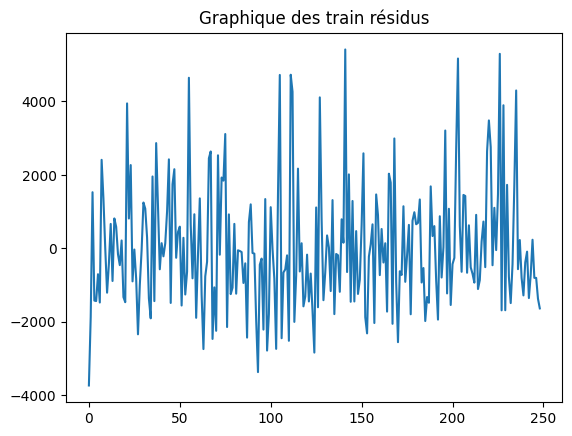

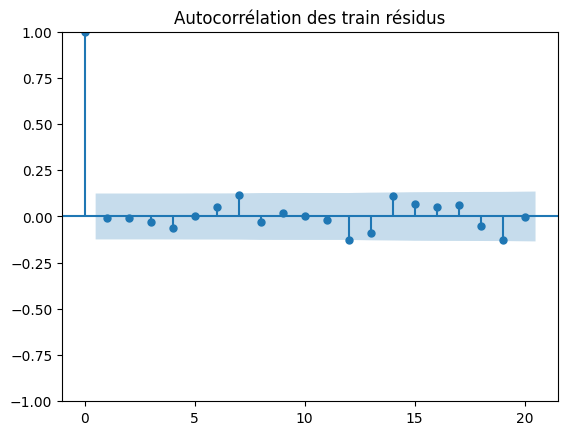

In [37]:
# import necessary libraries
import matplotlib.pyplot as plt

# Plot the histogram of residuals
plt.hist(train_residuals, bins=20)
plt.title('Histogramme des train résidus')
plt.show()

# plott the graph of residuals
plt.plot(train_residuals)
plt.title('Graphique des train résidus')
plt.show()

# plotting the autocorrelation graph of residuals
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_residuals, lags=20)
plt.title('Autocorrélation des train résidus')
plt.show()

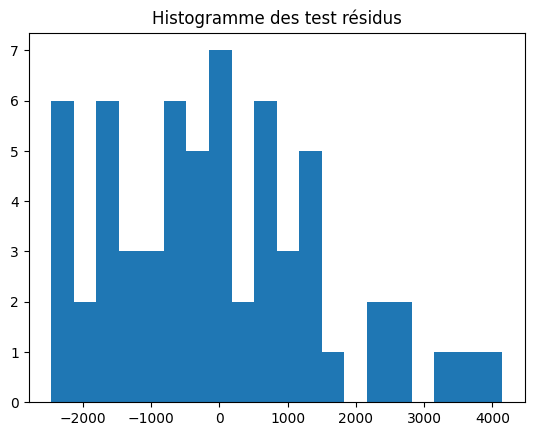

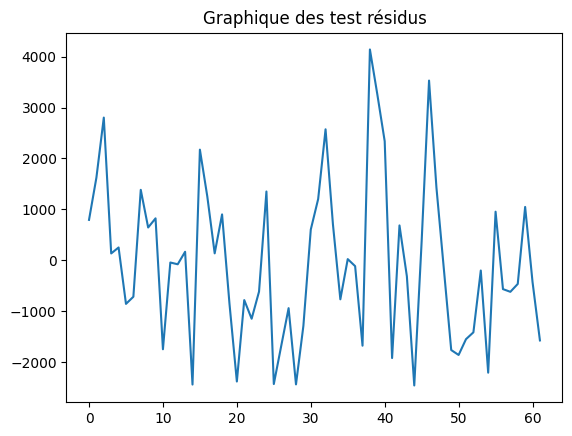

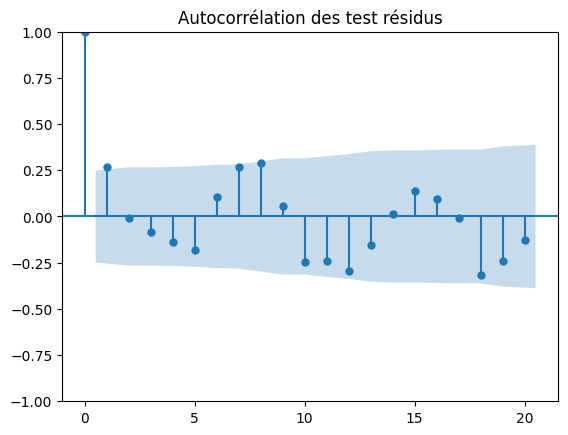

In [34]:
# import necessary libraries
import matplotlib.pyplot as plt

# plotting the histogram of residuals
plt.hist(test_residuals, bins=20)
plt.title('Histogramme des test résidus')
plt.show()

# plot the graph of residuals
plt.plot(test_residuals)
plt.title('Graphique des test résidus')
plt.show()

# plot the autocorrelation graph of residuals
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(test_residuals, lags=20)
plt.title('Autocorrélation des test résidus')
plt.show()

it seems that the model is good 

In [38]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np


# Train the model on the entire dataset
model = ARIMA(serie, order=(4, 0, 5))
model_fit = model.fit()

# Generating predictions for a specific future evaluation period
evaluation_start_date = '2022-11-08'
evaluation_end_date = '2022-12-31'

prediction_dates = pd.date_range(start=evaluation_start_date, end=evaluation_end_date)

# forecast for the evaluation period
forecast = model_fit.forecast(steps=len(prediction_dates))

# create a DataFrame for the predictions
prediction_data = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted_Amount': forecast  
})

# Saving predictions to a CSV file
prediction_data.to_csv('final_output_predictions.csv', index=False)
